In [1]:
#%matplotlib inline
#%matplotlib notebook

In [2]:
import cytoflow as flow
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib
import scipy.stats as stats
import scipy as sp
from scipy.stats.mstats import gmean
import scipy.optimize as opt
import numpy as np
from numpy import median
matplotlib.rc('figure', dpi = 160)

# Import samples and specify experimental condtions

sets the conditions of the tube

In [3]:
inputs = [
    ["20210630 LasR_Tube_001_050.fcs",0,0,'WT'],
    
    ["20210630 LasR_Tube_002_051.fcs",1e-8,0,'LasR'],
    ["20210630 LasR_Tube_003_052.fcs",1e-9,0,'LasR'],
    ["20210630 LasR_Tube_004_053.fcs",1e-10,0,'LasR'],
    ["20210630 LasR_Tube_005_054.fcs",1e-11,0,'LasR'],
    ["20210630 LasR_Tube_006_055.fcs",1e-12,0,'LasR'],
    ["20210630 LasR_Tube_007_056.fcs",1e-13,0,'LasR'],
    ["20210630 LasR_Tube_008_057.fcs",1e-14,0,'LasR'],
    ["20210630 LasR_Tube_009_058.fcs",0,0,'LasR'],
    
    ["20210630 LasR_Tube_010_059.fcs",1e-8,0.005,'LasR'],
    ["20210630 LasR_Tube_011_060.fcs",1e-9,0.005,'LasR'],
    ["20210630 LasR_Tube_012_061.fcs",1e-10,0.005,'LasR'],
    ["20210630 LasR_Tube_013_062.fcs",1e-11,0.005,'LasR'],
    ["20210630 LasR_Tube_014_063.fcs",1e-12,0.005,'LasR'],
    ["20210630 LasR_Tube_015_064.fcs",1e-13,0.005,'LasR'],
    ["20210630 LasR_Tube_016_065.fcs",1e-14,0.005,'LasR'],
    ["20210630 LasR_Tube_017_066.fcs",0,0.005,'LasR'],
    
    ["20210630 LasR_Tube_018_067.fcs",1e-8,0.01,'LasR'],
    ["20210630 LasR_Tube_019_068.fcs",1e-9,0.01,'LasR'],
    ["20210630 LasR_Tube_020_069.fcs",1e-10,0.01,'LasR'],
    ["20210630 LasR_Tube_021_070.fcs",1e-11,0.01,'LasR'],
    ["20210630 LasR_Tube_022_071.fcs",1e-12,0.01,'LasR'],
    ["20210630 LasR_Tube_023_072.fcs",1e-13,0.01,'LasR'],
    ["20210630 LasR_Tube_024_073.fcs",1e-14,0.01,'LasR'],
    ["20210630 LasR_Tube_025_074.fcs",0,0.01,'LasR'],
    
    ["20210630 LasR_Tube_026_075.fcs",1e-8,0.05,'LasR'],
    ["20210630 LasR_Tube_027_076.fcs",1e-9,0.05,'LasR'],
    ["20210630 LasR_Tube_028_077.fcs",1e-10,0.05,'LasR'],
    ["20210630 LasR_Tube_029_078.fcs",1e-11,0.05,'LasR'],
    ["20210630 LasR_Tube_030_079.fcs",1e-12,0.05,'LasR'],
    ["20210630 LasR_Tube_031_080.fcs",1e-13,0.05,'LasR'],
    ["20210630 LasR_Tube_032_081.fcs",1e-14,0.05,'LasR'],
    ["20210630 LasR_Tube_033_082.fcs",0,0.05,'LasR'],
    
    ["20210630 LasR_Tube_034_083.fcs",1e-8,0.1,'LasR'],
    ["20210630 LasR_Tube_035_084.fcs",1e-9,0.1,'LasR'],
    ["20210630 LasR_Tube_036_085.fcs",1e-10,0.1,'LasR'],
    ["20210630 LasR_Tube_037_086.fcs",1e-11,0.1,'LasR'],
    ["20210630 LasR_Tube_038_087.fcs",1e-12,0.1,'LasR'],
    ["20210630 LasR_Tube_039_088.fcs",1e-13,0.1,'LasR'],
    ["20210630 LasR_Tube_040_089.fcs",1e-14,0.1,'LasR'],
    ["20210630 LasR_Tube_041_090.fcs",0,0.1,'LasR'],
    
    ["20210630 LasR_Tube_042_091.fcs",1e-8,0.5,'LasR'],
    ["20210630 LasR_Tube_043_092.fcs",1e-9,0.5,'LasR'],
    ["20210630 LasR_Tube_044_093.fcs",1e-10,0.5,'LasR'],
    ["20210630 LasR_Tube_045_094.fcs",1e-11,0.5,'LasR'],
    ["20210630 LasR_Tube_046_095.fcs",1e-12,0.5,'LasR'],
    ["20210630 LasR_Tube_047_096.fcs",1e-13,0.5,'LasR'],
    ["20210630 LasR_Tube_048_097.fcs",1e-14,0.5,'LasR'],
    ["20210630 LasR_Tube_049_098.fcs",0,0.5,'LasR'],

   
    


]

       
tubes = []
for filename, ahl, iptg, family in inputs:
    tubes.append(flow.Tube(file = 'data/' + filename, conditions = {'AHL' : ahl, 'IPTG' : iptg, 'Family' : family}))
    
ex = flow.ImportOp(conditions = {'AHL' : 'float', 'IPTG' : 'float', 'Family' : 'str'},
                   tubes = tubes).apply()
       


In [4]:
flow.set_default_scale("log")

# Plot FITC-A histograms for all IPTG and AHL induction conditions

C:\Users\Jonathan\anaconda3\envs\cf2\lib\site-packages\cytoflow\utility\log_scale.py:117: RuntimeWarning: invalid value encountered in log10


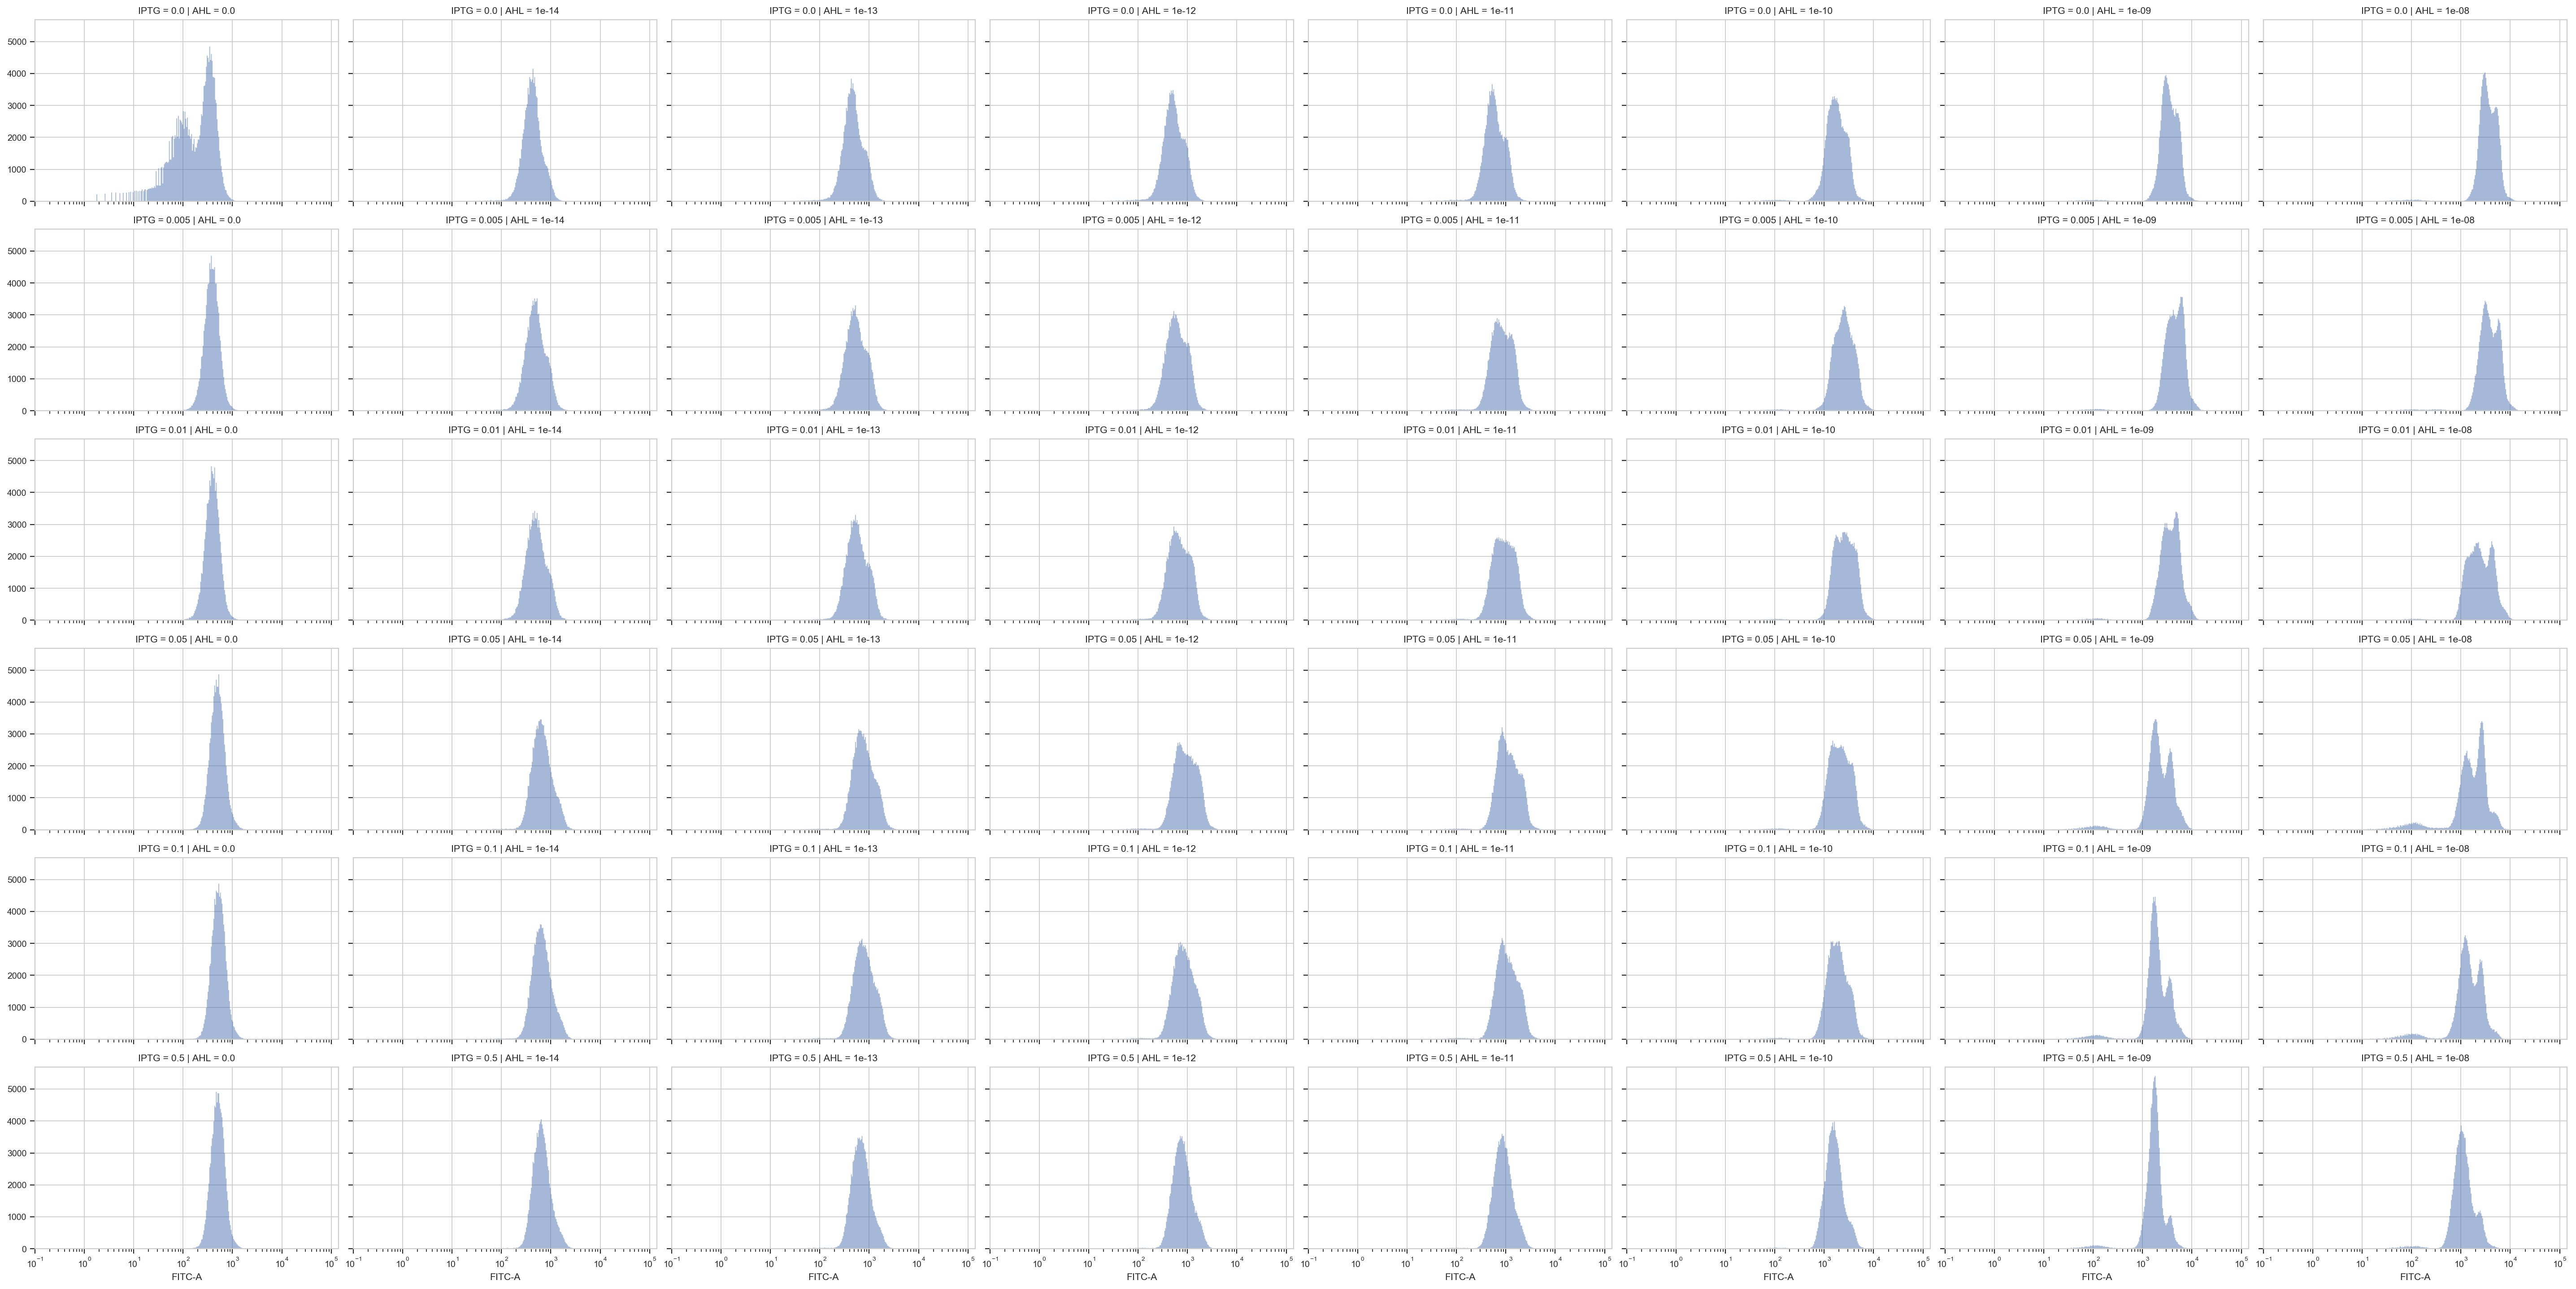

In [5]:

flow.HistogramView(channel = "FITC-A",
                   xfacet = "AHL",
                  yfacet = 'IPTG').plot(ex)

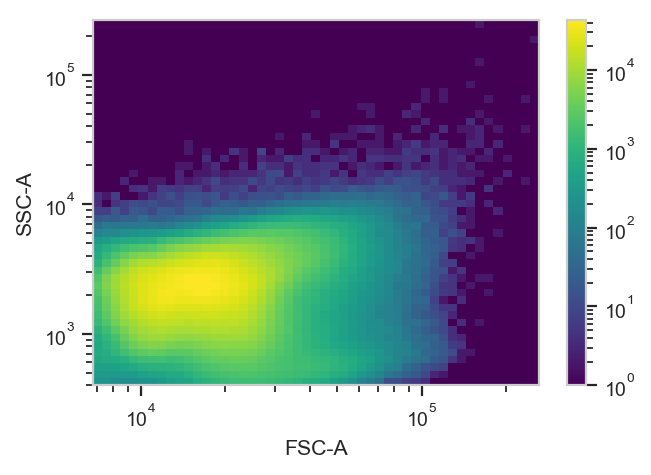

In [6]:
flow.DensityView(xchannel = "FSC-A", 
                 ychannel = "SSC-A",
                 xscale = 'log',
                 yscale = 'log').plot(ex, min_quantile = 0.005)

# Singlet gating to remove doublets

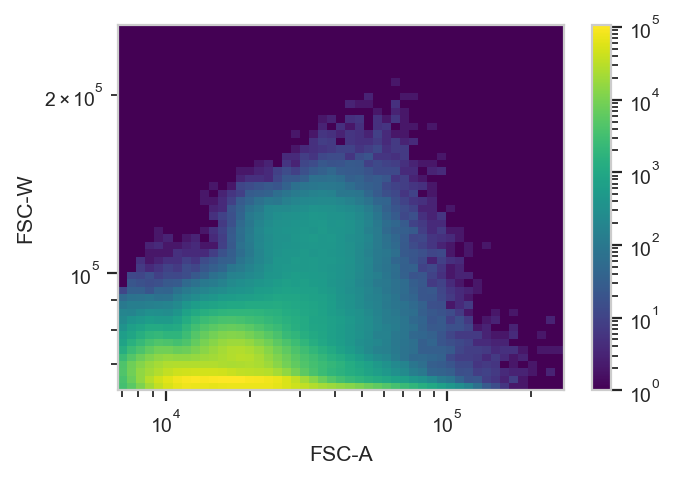

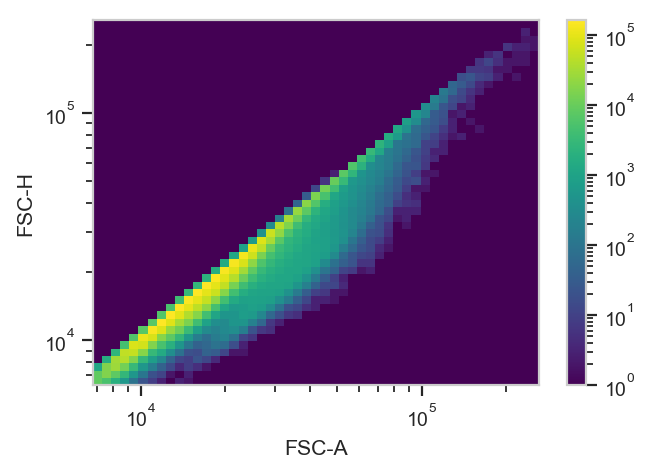

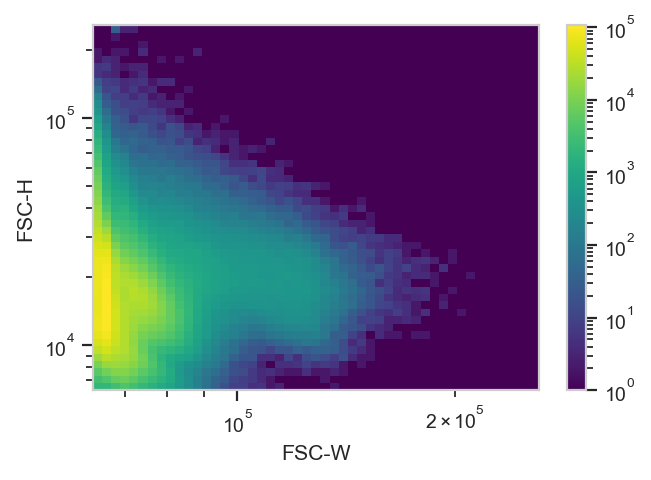

In [7]:

#channels = ['FSC-A','FSC-W','FSC-H','SSC-A','SSC-W','SSC-H']
#perm = combinations(channels,2)
FSC = [('FSC-A','FSC-W'),('FSC-A','FSC-H'),('FSC-W','FSC-H')]

#f, axes = plt.subplots(ncols=4,nrows=4)
#axs = axes.ravel()
for i,(x,y) in enumerate(FSC):  
    flow.DensityView(xchannel = x, 
                ychannel = y,
                xscale = 'log',
                yscale = 'log').plot(ex, min_quantile = 0.005)


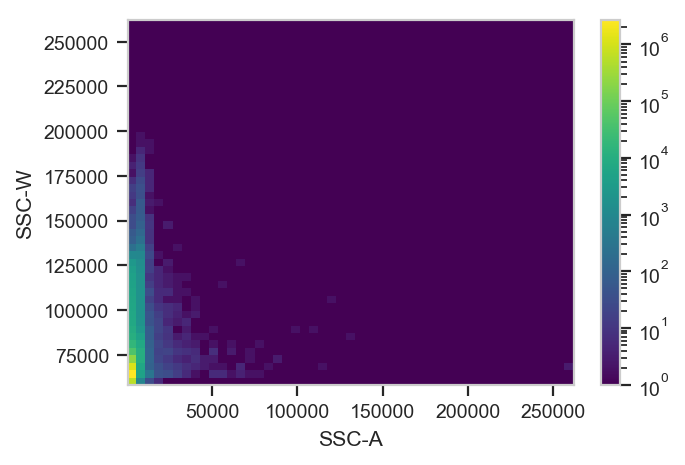

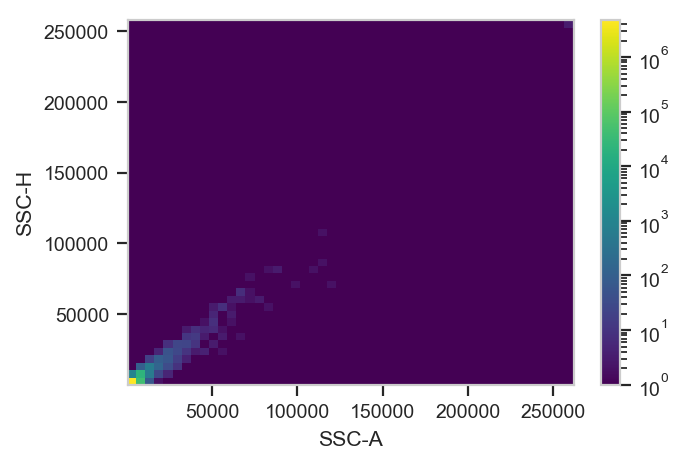

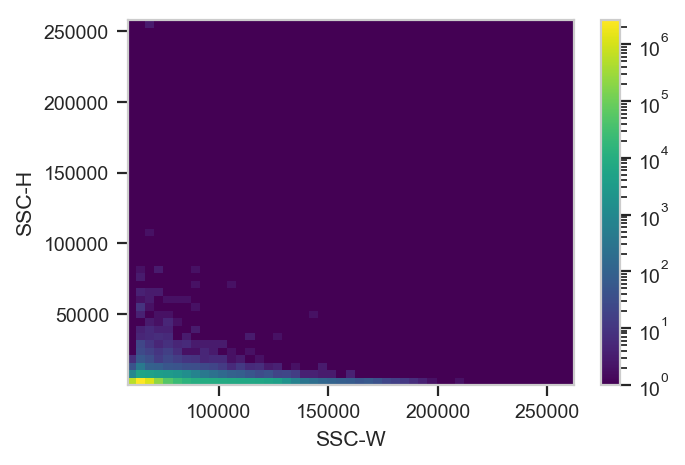

In [8]:
SSC = [('SSC-A','SSC-W'),('SSC-A','SSC-H'),('SSC-W','SSC-H')]
for i,(x,y) in enumerate(SSC):  
    flow.DensityView(xchannel = x, 
                ychannel = y,
                xscale = 'linear',
                yscale = 'linear').plot(ex, min_quantile = 0.005)

## Create and store singlet gate

saves the single data as ex2

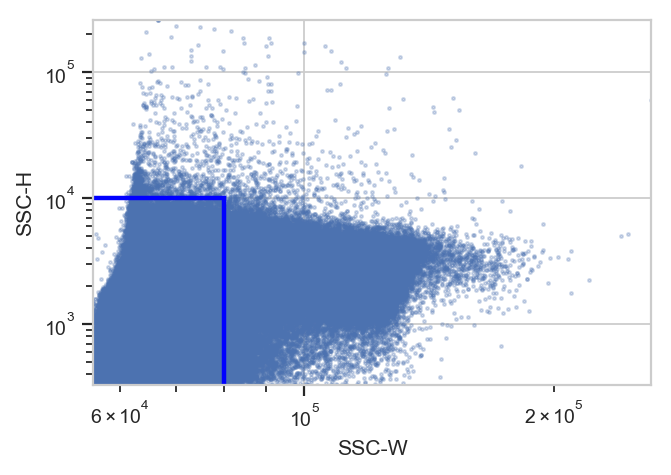

In [9]:
r = flow.Range2DOp(name = "Range2D",
                   xchannel = "SSC-W",
                   xlow = 55000,
                   xhigh = 80000,
                   ychannel = "SSC-H",
                   ylow = 100,
                   yhigh = 10000)
                   
rv = r.default_view(xscale ='log',yscale='log')

rv.plot(ex)
ex2 = r.apply(ex)

## Use a gaussian mixture model to further gate the population

C:\Users\Jonathan\anaconda3\envs\cf2\lib\site-packages\cytoflow\utility\log_scale.py:117: RuntimeWarning: invalid value encountered in log10
C:\Users\Jonathan\anaconda3\envs\cf2\lib\site-packages\cytoflow\operations\gaussian.py:529: RuntimeWarning: invalid value encountered in less_equal
C:\Users\Jonathan\anaconda3\envs\cf2\lib\site-packages\cytoflow\operations\base_op_views.py:342: CytoflowViewWarning: Setting 'huefacet' to 'GM_1'


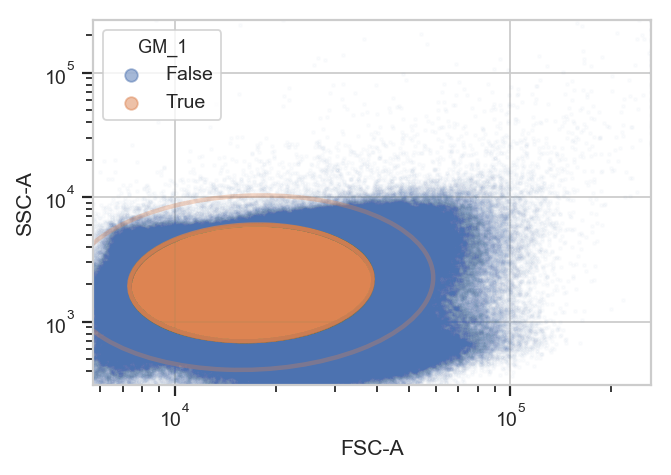

In [10]:
gm = flow.GaussianMixtureOp(name = "GM",
                            channels = ['FSC-A', 'SSC-A'],
                            scale = {'FSC-A' : 'log',
                                     'SSC-A' : 'log'},
                            num_components = 1,
                            sigma = 2)
gm.estimate(ex2)
ex_gm = gm.apply(ex2)
gm.default_view().plot(ex_gm, alpha = 0.02)

C:\Users\Jonathan\anaconda3\envs\cf2\lib\site-packages\cytoflow\utility\log_scale.py:117: RuntimeWarning: invalid value encountered in log10
C:\Users\Jonathan\anaconda3\envs\cf2\lib\site-packages\cytoflow\operations\gaussian.py:529: RuntimeWarning: invalid value encountered in less_equal
C:\Users\Jonathan\anaconda3\envs\cf2\lib\site-packages\cytoflow\operations\base_op_views.py:342: CytoflowViewWarning: Setting 'huefacet' to 'GM3_1'


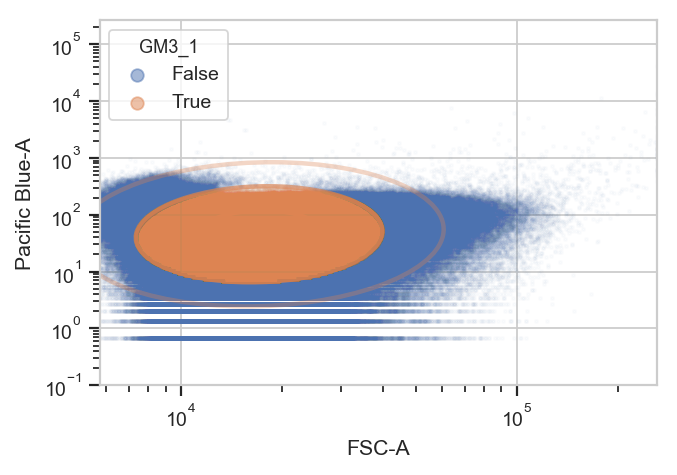

In [11]:
gm3 = flow.GaussianMixtureOp(name = "GM3",
                            channels = ['FSC-A', 'Pacific Blue-A'],
                            scale = {'FSC-A' : 'log',
                                     'Pacific Blue-A' : 'log'},
                            num_components = 1,
                            sigma = 2)
gm3.estimate(ex_gm)
ex_gm2 = gm3.apply(ex_gm)
gm3.default_view().plot(ex_gm2, alpha = 0.02)

In [12]:
df =ex_gm2.data

take the stuff from cytoflow and changing it to datatframe

# filter out events that don't fall within the gates

In [13]:

df = df[(df.GM_1==True) & (df.GM3_1==True) & (df.Range2D==True) & (df['FITC-A'] >0)]
df

,AHL,AmCyan-A,AmCyan-H,AmCyan-W,FITC-A,FITC-H,FITC-W,FSC-A,FSC-H,FSC-W,...,PerCP-Cy5-5-A,PerCP-Cy5-5-H,PerCP-Cy5-5-W,SSC-A,SSC-H,SSC-W,Time,Range2D,GM_1,GM3_1
1,0.0,110.160004,129.0,55964.695312,61.599998,109.0,37036.859375,22100.021484,22089.0,65568.695312,...,15752.000000,13877.0,74390.945312,2737.679932,2765.0,64888.460938,41.700001,True,True,True
2,0.0,128.520004,72.0,116981.765625,89.760002,126.0,46686.597656,12685.940430,12778.0,65063.843750,...,12002.320312,13564.0,57990.570312,1376.319946,1390.0,64891.007812,41.700001,True,True,True
3,0.0,23.120001,53.0,28588.535156,30.799999,125.0,16148.069336,12966.990234,13161.0,64569.921875,...,9998.559570,9681.0,67685.734375,2138.399902,2185.0,64138.296875,41.799999,True,True,True
4,0.0,39.439999,76.0,34009.734375,81.839996,124.0,43253.761719,14129.150391,14200.0,65209.015625,...,11414.479492,12072.0,61966.480469,2284.479980,2344.0,63871.875000,41.799999,True,True,True
5,0.0,127.160004,119.0,70029.898438,12.320000,76.0,10623.731445,17395.900391,17496.0,65161.046875,...,11186.559570,11315.0,64792.085938,2936.560059,3036.0,63389.457031,41.799999,True,True,True
6,0.0,69.360001,76.0,59810.226562,47.520000,103.0,30235.640625,10226.570312,10035.0,66787.101562,...,18112.160156,17848.0,66505.968750,2583.679932,2691.0,62922.355469,41.900002,True,True,True
9,0.0,63.240002,101.0,41034.621094,78.320000,135.0,38020.585938,10099.549805,9555.0,69270.968750,...,17338.640625,17441.0,65151.375000,3276.239990,3315.0,64769.730469,41.900002,True,True,True
12,0.0,43.520000,95.0,30022.386719,143.440002,84.0,111910.523438,10001.730469,9840.0,66613.148438,...,15143.040039,15883.0,62482.796875,2692.800049,2800.0,63026.906250,42.000000,True,True,True
13,0.0,14.960000,86.0,11400.214844,58.959999,89.0,43415.757812,12171.290039,10925.0,73012.148438,...,24084.720703,21266.0,74222.539062,2045.119995,2009.0,66714.273438,42.099998,True,True,True
14,0.0,102.680000,111.0,60623.753906,74.800003,117.0,41898.230469,11636.930664,10737.0,71028.960938,...,19046.720703,17659.0,70686.101562,3854.399902,3793.0,66596.882812,42.200001,True,True,True


In [14]:
df.columns 



Index(['AHL', 'AmCyan-A', 'AmCyan-H', 'AmCyan-W', 'FITC-A', 'FITC-H', 'FITC-W',
       'FSC-A', 'FSC-H', 'FSC-W', 'Family', 'IPTG', 'Pacific Blue-A',
       'Pacific Blue-H', 'Pacific Blue-W', 'PerCP-Cy5-5-A', 'PerCP-Cy5-5-H',
       'PerCP-Cy5-5-W', 'SSC-A', 'SSC-H', 'SSC-W', 'Time', 'Range2D', 'GM_1',
       'GM3_1'],
      dtype='object')

In [15]:
data = df[['FITC-A','AHL','IPTG','Family']]
data.insert(4,'Replicate',3)
data.to_pickle('../compiled-data/se/las/LasSE_3.pkl')
#uncomment these when you are ready to save replicates and compile replicate from other runs

In [16]:
# Subtract WT background from samples
data = df[['FITC-A','AHL','IPTG','Family']]
data['FITC-A'] = data['FITC-A'] - data[data.Family=='WT']['FITC-A'].median()
data['FITC-A'] = data[data['FITC-A'] > 0]['FITC-A']
data = data[data.Family=='LasR']
data.drop('Family',inplace=True,axis=1)

C:\Users\Jonathan\anaconda3\envs\cf2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Jonathan\anaconda3\envs\cf2\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [17]:
data['FITC-A'].min()

0.8799972534179688

In [18]:
data

,FITC-A,AHL,IPTG
100002,4790.719826,1.000000e-08,0.0
100003,2398.879982,1.000000e-08,0.0
100004,2510.639992,1.000000e-08,0.0
100006,4312.879982,1.000000e-08,0.0
100007,3289.440041,1.000000e-08,0.0
100008,4992.239845,1.000000e-08,0.0
100010,7167.600197,1.000000e-08,0.0
100011,2175.359962,1.000000e-08,0.0
100013,4238.960060,1.000000e-08,0.0
100014,6277.920021,1.000000e-08,0.0


# Plot median FITC-A

use median or geometeric mean 

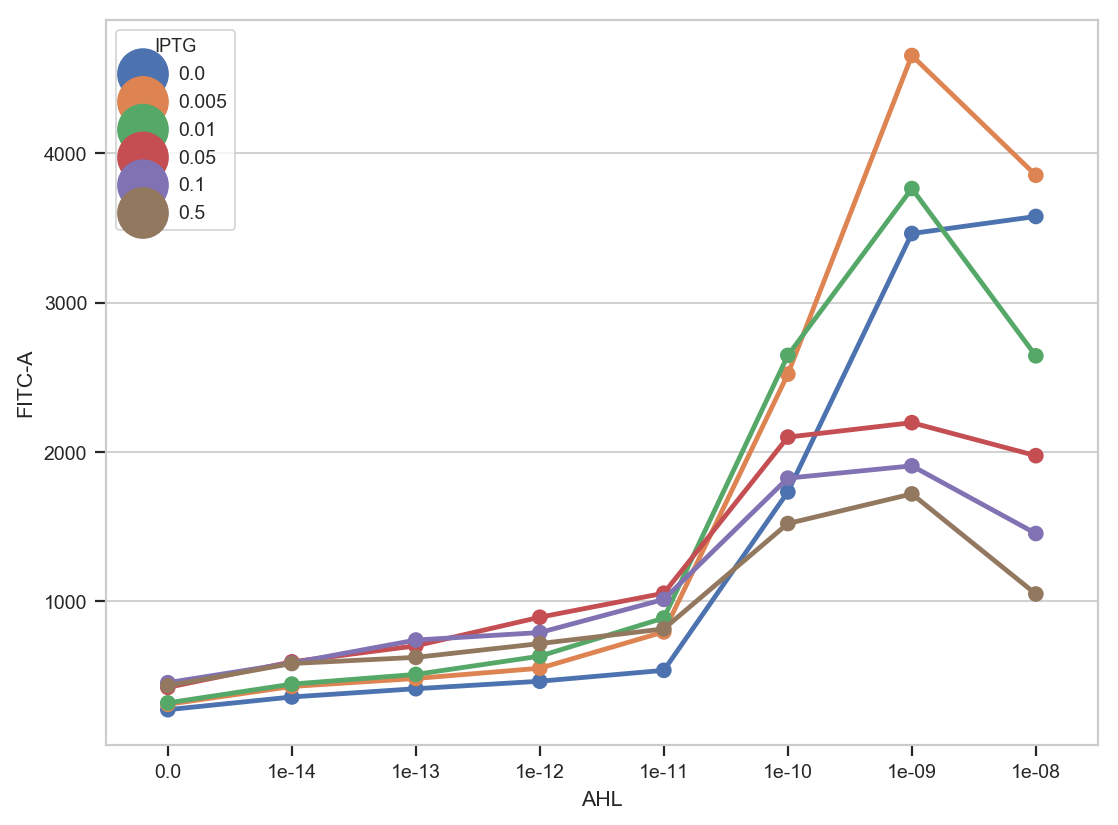

In [19]:
mfi = data.groupby(['AHL','IPTG'])['FITC-A'].median().reset_index()

f, ax = plt.subplots(figsize=(8,6))
sns.pointplot(x='AHL',y='FITC-A',hue='IPTG',data=mfi)
f.savefig('Las.png',dpi=600)

# Plot heatmaps showing absolute and relative induction

Raw signal 

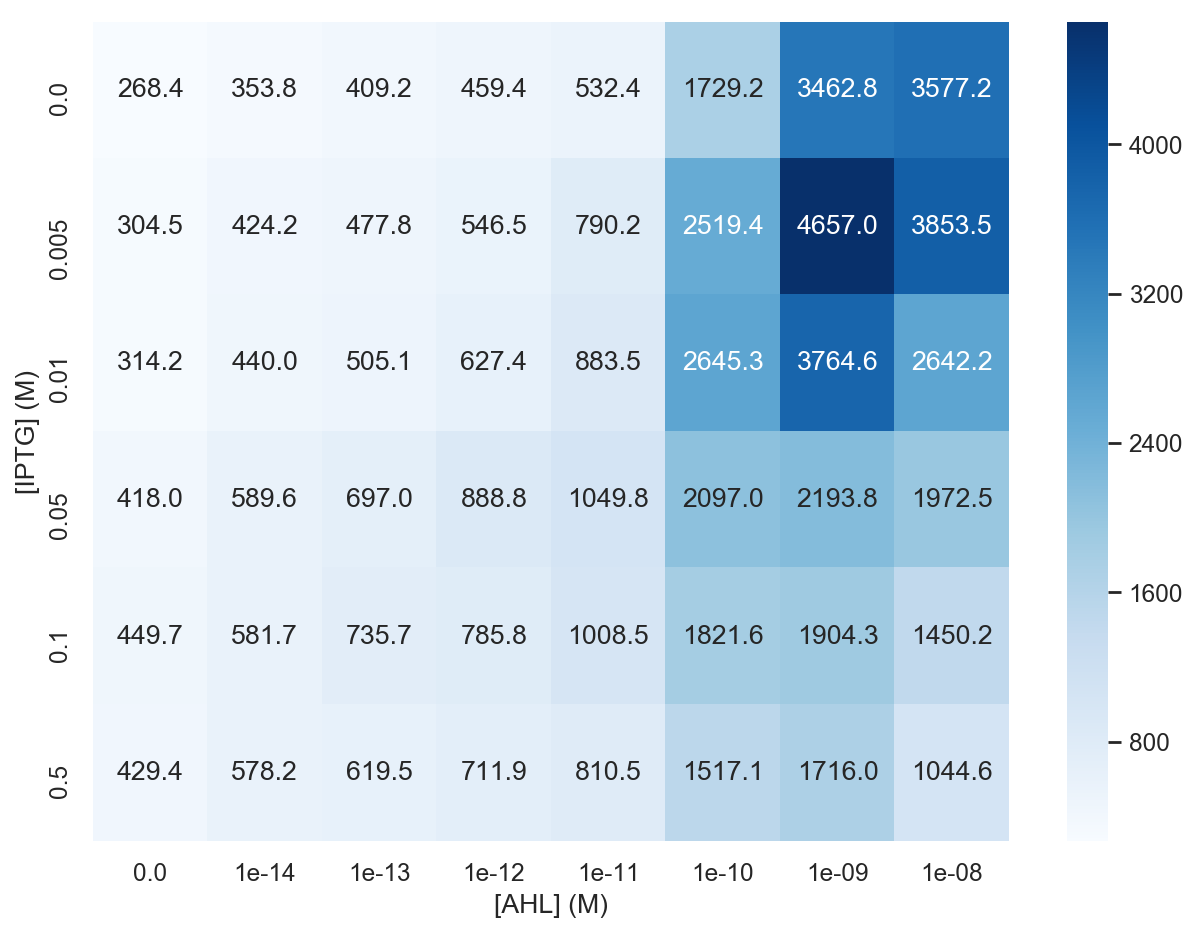

In [20]:
#LasMeans = Las.groupby(['C_ahl','C_iptg']).mean().reset_index()
sns.set(style="white")
#sns.set_style('Talk')
#LasTable = pd.pivot_table(LasMeans,values='FITC-A',index='C_iptg',columns='C_ahl')
f, ax = plt.subplots(figsize=(8,6))
#g = sns.heatmap(LasTable,vmin=0,vmax=100,xticklabels=[0,1e-10,1e-9,1e-7],yticklabels=[0,1e-3,1e-4,1e-5],ax=ax,square=True,cmap='Reds')



#f.savefig('LasHeatmap.png',dpi=600)

#mean['FITC-A']=mean['FITC-A']/mean['FITC-A'].max()*100

piv = mfi.pivot_table(index='IPTG', columns='AHL', values='FITC-A')
g = sns.heatmap(piv, annot=True, fmt=".1f",cmap='Blues')
cbar = g.collections[0].colorbar
#cbar.set_ticks([0, 25, 50, 75,100])
#cbar.set_ticklabels(['0%', '25%', '50%', '75%', '100%'])
ax.set_xlabel(r'[AHL] (M)')
ax.set_ylabel(r'[IPTG] (M)')
f.tight_layout()

Normalized to highest signal 

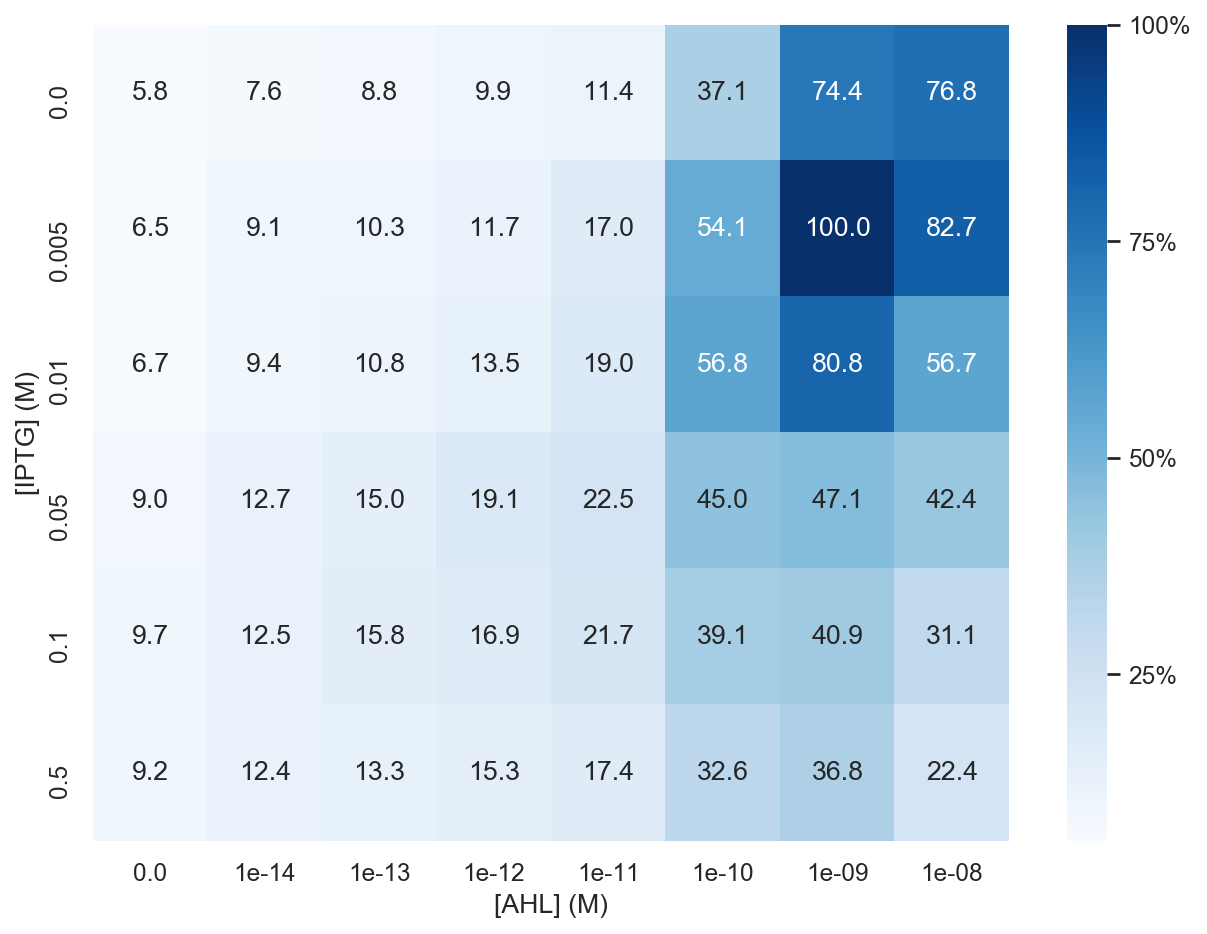

In [21]:
f, ax = plt.subplots(figsize=(8,6))
# normalized
norm = mfi.copy()
norm['FITC-A']=norm['FITC-A']/norm['FITC-A'].max()*100

piv = norm.pivot_table(index='IPTG', columns='AHL', values='FITC-A')
g = sns.heatmap(piv, annot=True, fmt=".1f",cmap='Blues')
cbar = g.collections[0].colorbar
cbar.set_ticks([0, 25, 50, 75,100])
cbar.set_ticklabels(['0%', '25%', '50%', '75%', '100%'])
ax.set_xlabel(r'[AHL] (M)')
ax.set_ylabel(r'[IPTG] (M)')
f.tight_layout()

# Calculate the on/off ratio and plot

In [22]:

R =[]
for i in mfi.IPTG.unique():
    tmp = mfi[mfi.IPTG ==i]['FITC-A'].max()/mfi[mfi.IPTG ==i]['FITC-A'].min()
    R.append([i,tmp])



In [23]:

R = pd.DataFrame(R,columns=['IPTG','Induction Ratio'])
R

,IPTG,Induction Ratio
0,0.000,13.327869
1,0.005,15.294798
2,0.010,11.983193
3,0.050,5.248421
4,0.100,4.234834
5,0.500,3.995902


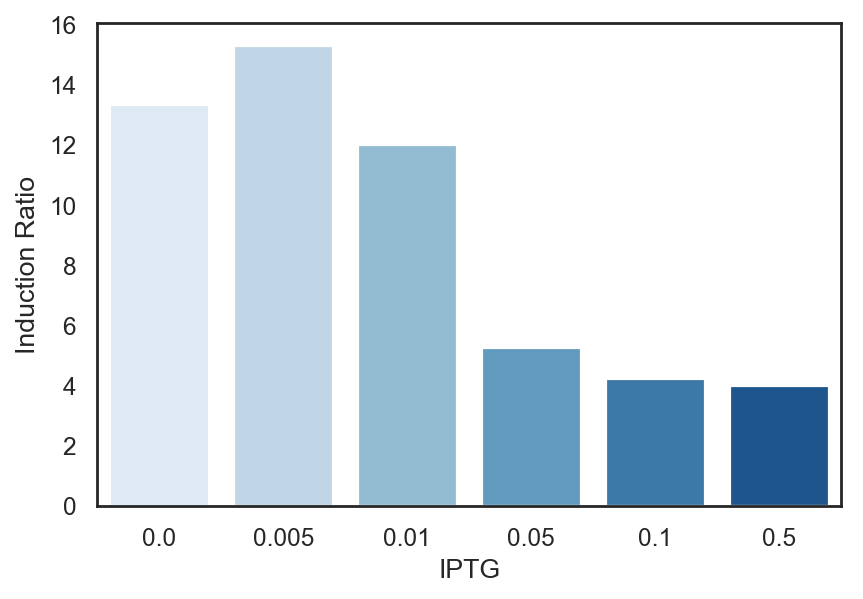

In [24]:
f, ax  = plt.subplots()
sns.barplot(x='IPTG',y='Induction Ratio',data=R,palette='Blues')

STOP HERE